In [1]:
import os
import math
import random
import warnings
import numpy as np
import pandas as pd 
from sklearn import metrics
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats as st
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv(r"C:\Workplace\C++\temp_sol_dev\test\d2ome_restructure\d2ome_GUI\d2ome_GUI\v2\bin\Release\Estimated_neh_numbers_liverpool_liver_.csv")
data=data[data.APE_RMSE<0.01]

In [3]:
prot_count=pd.DataFrame(np.unique(data.Protein,return_counts=True)).transpose()
prot_count.columns=['Protein','Pep_count']
prot_count=prot_count.sort_values(by='Pep_count',ascending=False)

selected_prot=prot_count.head(30).Protein

In [4]:
# prot_count.head(30)

CPSM_MOUSE 76 21 18
mode -without R,D [0.0846]
mode -with R,D [0.07766]


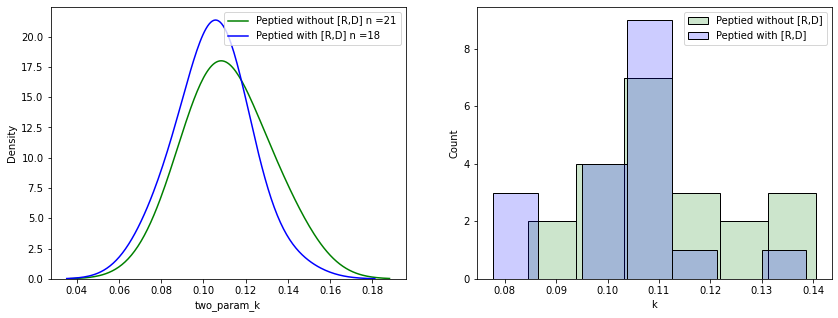

AL1L1_MOUSE 32 9 5
mode -without R,D [0.16343]
mode -with R,D [0.13087]


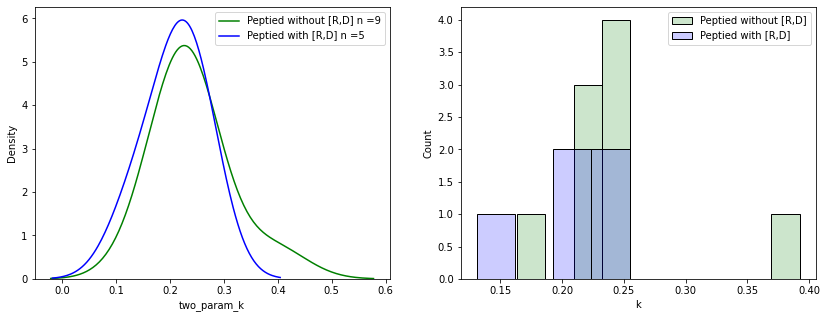

FAS_MOUSE 30 7 9
mode -without R,D [0.1726]
mode -with R,D [0.17724]


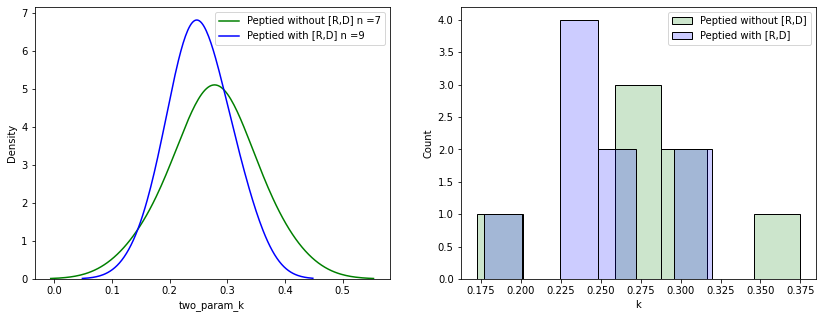

PYC_MOUSE 26 2 12
mode -without R,D [0.08706]
mode -with R,D [0.10426]


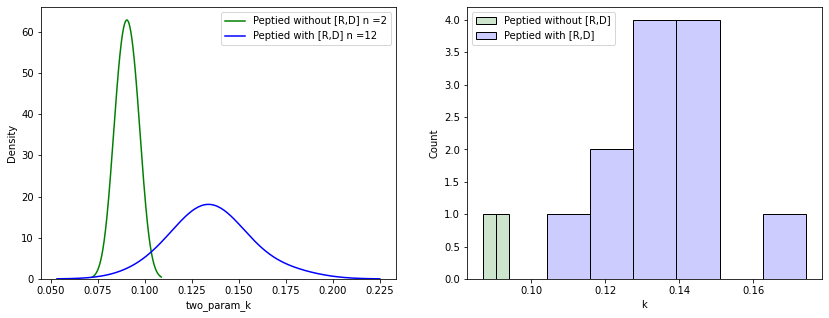

DHE3_MOUSE 25 6 9
mode -without R,D [0.09116]
mode -with R,D [0.10539]


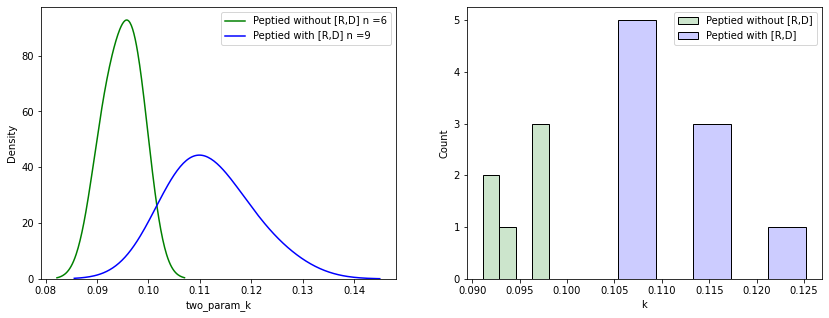

ATPB_MOUSE 23 3 8
mode -without R,D [0.09166]
mode -with R,D [0.07844]


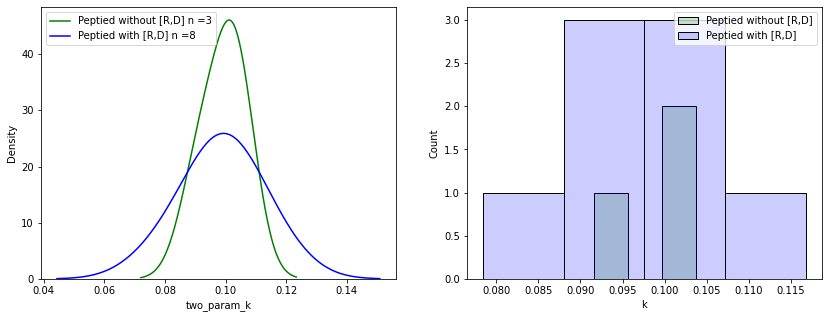

ASSY_MOUSE 21 8 3
mode -without R,D [0.0867]
mode -with R,D [0.18726]


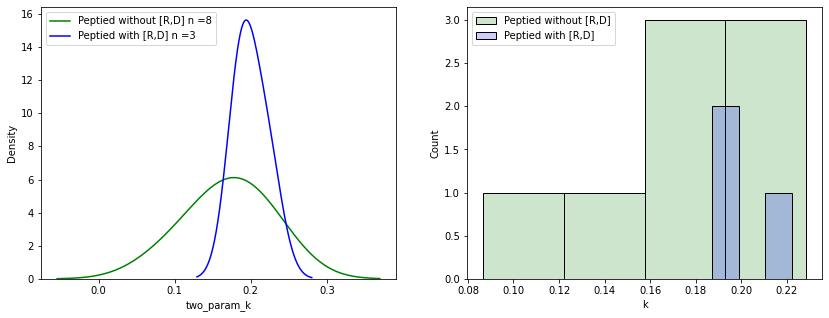

ATPA_MOUSE 21 2 5
mode -without R,D [0.10711]
mode -with R,D [0.08817]


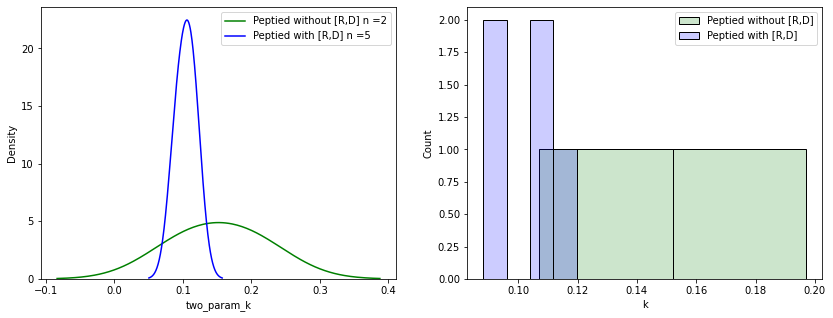

HMCS2_MOUSE 20 3 2
mode -without R,D [0.15165]
mode -with R,D [0.19217]


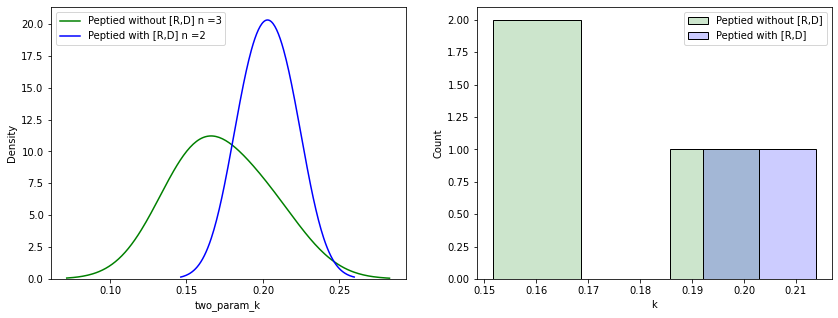

PYGL_MOUSE 20 5 6
mode -without R,D [0.07814]
mode -with R,D [0.11022]


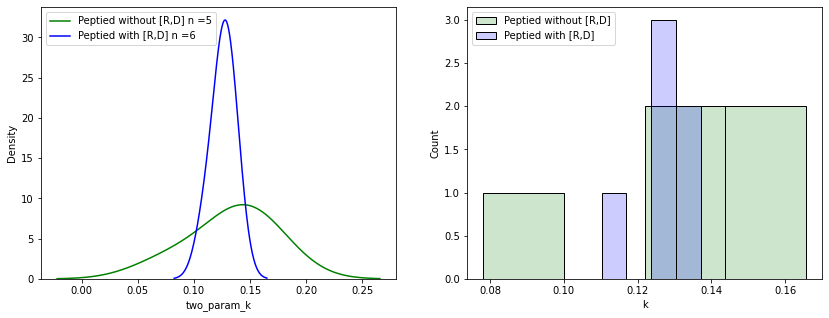

HYES_MOUSE 19 3 6
mode -without R,D [0.21473]
mode -with R,D [0.18229]


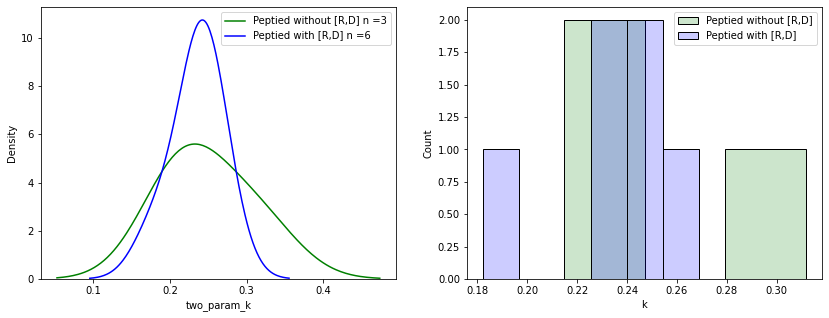

EST1D_MOUSE 17 5 5
mode -without R,D [0.13418]
mode -with R,D [0.19951]


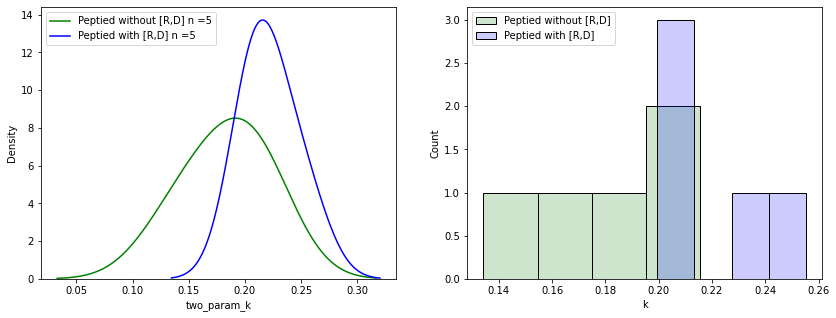

F16P1_MOUSE 16 4 8
mode -without R,D [0.19198]
mode -with R,D [0.17608]


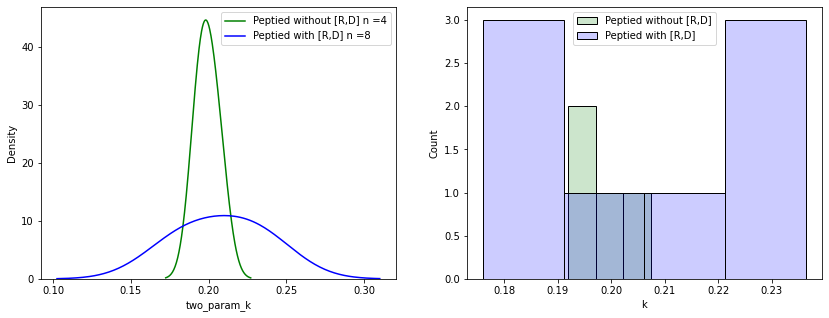

DHSO_MOUSE 16 10 2
mode -without R,D [0.1455]
mode -with R,D [0.13948]


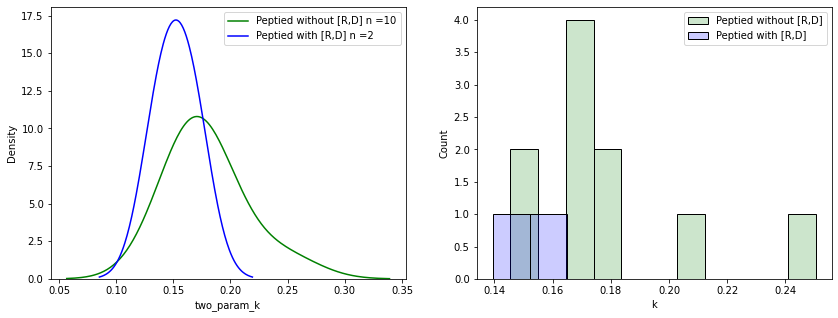

PDIA1_MOUSE 16 6 2
mode -without R,D [0.10212]
mode -with R,D [0.23938]


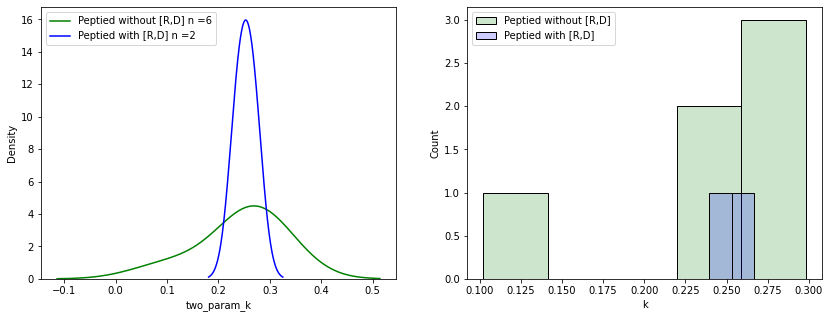

EF2_MOUSE 16 2 4
mode -without R,D [0.18516]
mode -with R,D [0.24081]


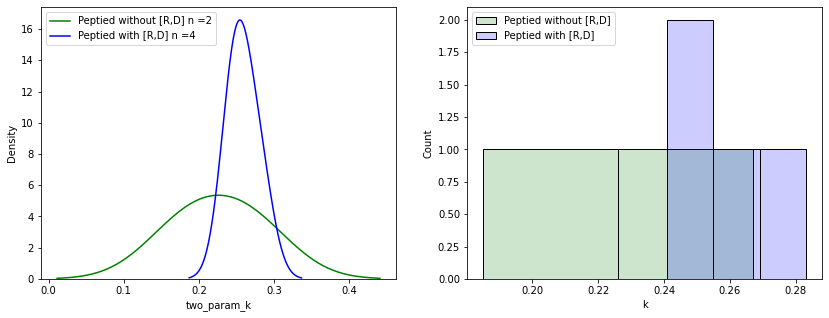

AL1A1_MOUSE 16 6 4
mode -without R,D [0.16268]
mode -with R,D [0.18083]


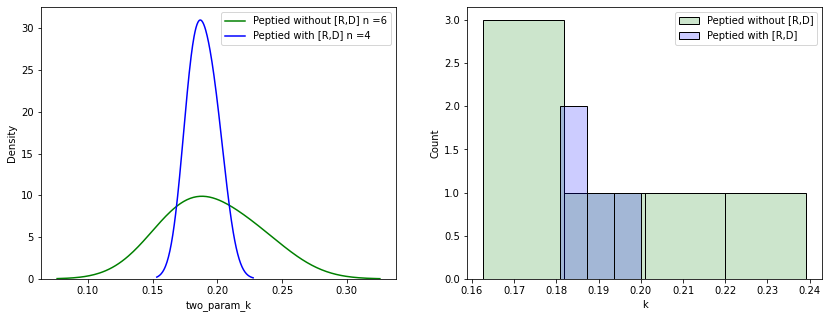

ECHA_MOUSE 16 4 4
mode -without R,D [0.12667]
mode -with R,D [0.11741]


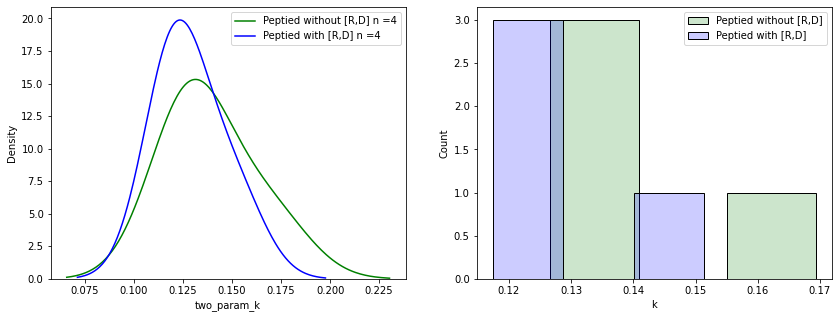

SBP1_MOUSE 16 3 6
mode -without R,D [0.14348]
mode -with R,D [0.12178]


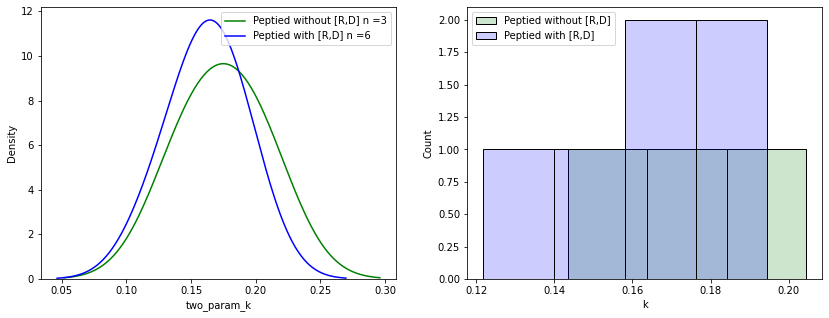

SARDH_MOUSE 16 2 7
mode -without R,D [0.0943]
mode -with R,D [0.09119]


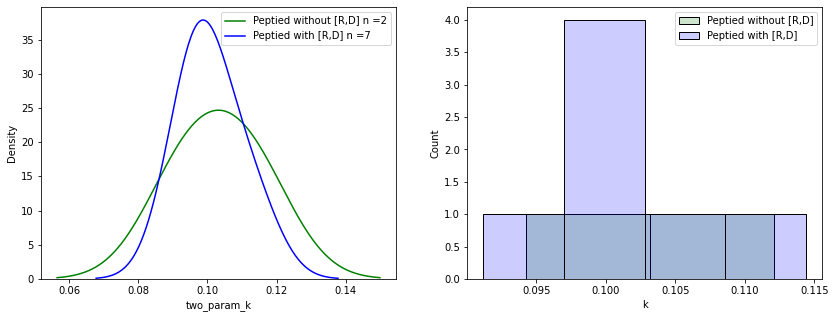

BHMT1_MOUSE 16 2 6
mode -without R,D [0.1908]
mode -with R,D [0.13884]


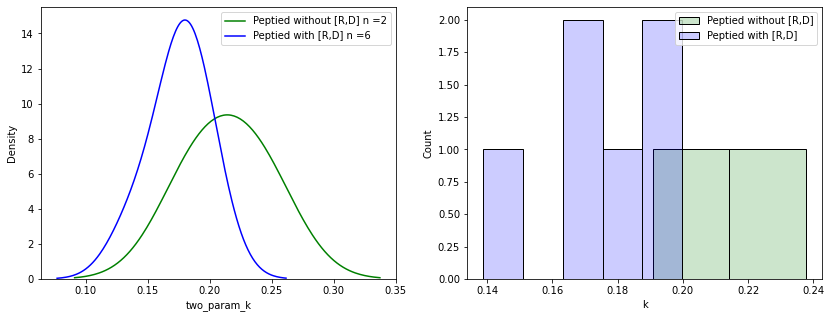

THIM_MOUSE 15 3 2
mode -without R,D [0.11601]
mode -with R,D [0.10172]


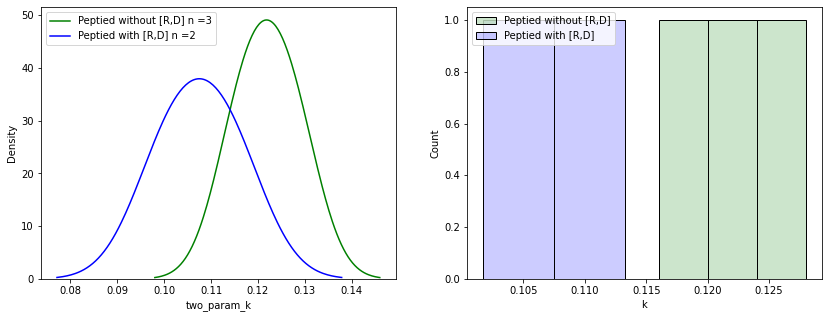

ALDH2_MOUSE 15 7 4
mode -without R,D [0.16448]
mode -with R,D [0.29121]


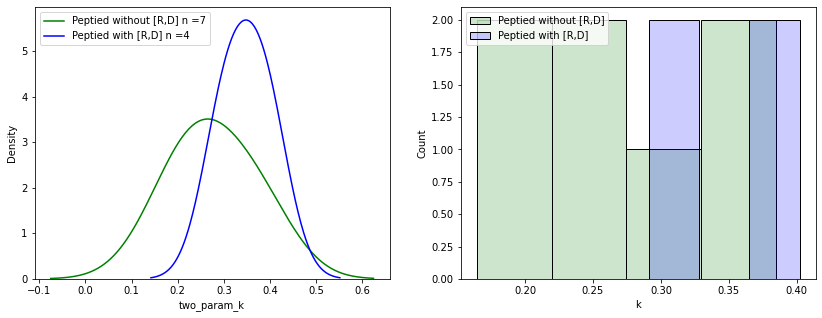

SAHH_MOUSE 15 4 5
mode -without R,D [0.15598]
mode -with R,D [0.15657]


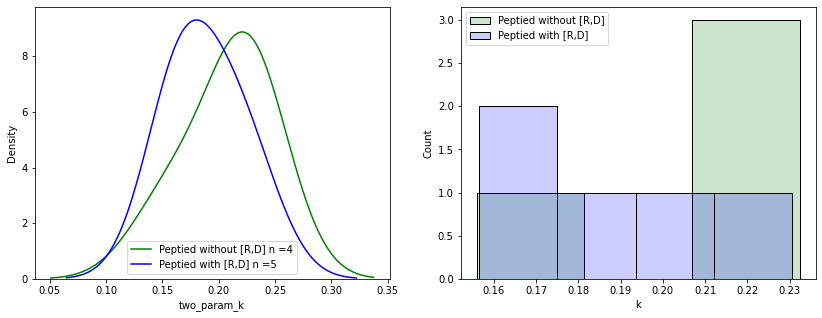

HUTU_MOUSE 14 3 6
mode -without R,D [0.19266]
mode -with R,D [0.16752]


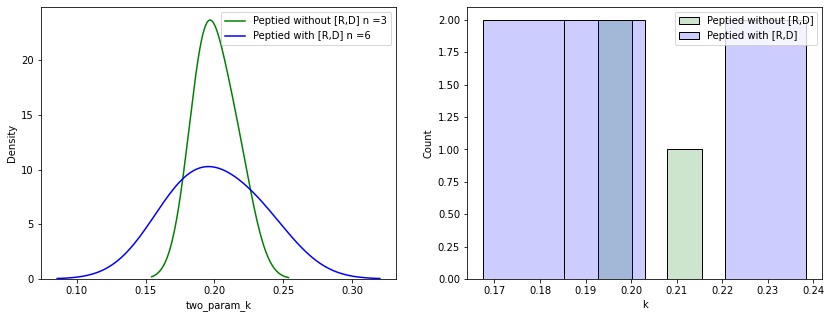

In [5]:
for prot_name in selected_prot:
# prot_name='CPSM_MOUSE'

    temp_data=data[data.Protein==prot_name]
    temp_data=temp_data[temp_data.APE_RMSE<0.01]
    
    normal=[x for x in temp_data.Peptide if  'R' not in x and 'D' not in x  ]
    under_estimate=[x for x in temp_data.Peptide if  'R'  in x and 'D'  in x  ]

    temp_data_normal=temp_data.query(f'Peptide in {normal}')
    temp_data_under_estimate=temp_data.query(f'Peptide in {under_estimate}')
    
    if temp_data_normal.shape[0]<2 or temp_data_under_estimate.shape[0]<2:
        continue

    print(prot_name,temp_data.shape[0],temp_data_normal.shape[0],temp_data_under_estimate.shape[0])
    print("mode -without R,D",list(st.mode(temp_data_normal.two_param_k)[0]))
    print("mode -with R,D",list(st.mode(temp_data_under_estimate.two_param_k)[0]))
    
#     plt.figure(figsize=(15,5))
#     plt.subplot(1,3,1)
#     plt.scatter(temp_data_normal.T_NEH ,temp_data_normal.APE_NEH,c='g',alpha=0.8,label='Peptied without [H,S,P]')
#     plt.plot(range(1,max(temp_data.T_NEH)) , range(1,max(temp_data.T_NEH)) ,ls=':' ,c='r')
#     plt.xlabel('true NEH')
#     plt.ylabel('estimated NEH')
#     plt.legend()

#     plt.subplot(1,3,2)
#     plt.scatter(temp_data_under_estimate.T_NEH, temp_data_under_estimate.APE_NEH,c='b',alpha=0.5,label='Peptied with [H,S,P]')
#     plt.plot(range(1,max(temp_data.T_NEH)) , range(1,max(temp_data.T_NEH)) ,ls=':' ,c='r')
#     plt.xlabel('true NEH')
#     plt.ylabel('estimated NEH')
#     plt.legend()

#     plt.subplot(1,3,3)
    plt.figure(figsize=(14,5))
    plt.subplot(1,2,1)
    sns.kdeplot(temp_data_normal.two_param_k,color='green',label=f'Peptied without [R,D] n ={temp_data_normal.shape[0]}',bw=1)
    sns.kdeplot(temp_data_under_estimate.two_param_k,color='blue',label=f'Peptied with [R,D] n ={temp_data_under_estimate.shape[0]}',bw=1)
    plt.legend()
    
    plt.subplot(1,2,2)
    sns.histplot(temp_data_normal.two_param_k,color='green',label='Peptied without [R,D]',kde=False,alpha=0.2)
    sns.histplot(temp_data_under_estimate.two_param_k,color='blue',label='Peptied with [R,D]',kde=False,alpha=0.2)
    plt.xlabel('k')
    plt.legend()

    plt.show()

